In [25]:
%load_ext autoreload
%autoreload 2

import sys, os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("사용 장치:", device)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
사용 장치: cuda:0


In [40]:
import numpy as np
import json
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

from dataloader import MedicalDataset,ImageTransform,make_datapath_list,split_dataset

import torch
import torchvision
from torchvision import models, transforms
import torch
import torch.nn as nn

# 난수 시드 고정
torch.manual_seed(42)

## 1. 모델 불러오기

In [9]:
net = models.vgg16(pretrained=True)
net.classifier[6] = nn.Linear(in_features=4096, out_features=2) # VGG16의 마지막 출력층의 출력 유닛을 수술 여부 (0,1)로 변경

load_path = './weights_transfer_learning.pth'
load_weights = torch.load(load_path)
net.load_state_dict(load_weights)

# GPU에 저장된 가중치를 CPU에 로드하는 경우
load_weights = torch.load(load_path, map_location={'cuda:0': 'cpu'})
net.load_state_dict(load_weights)

<All keys matched successfully>

## 2. 추론 테스트

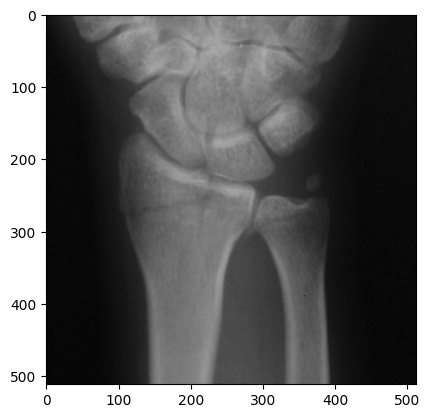

tensor([0], device='cuda:0')

In [53]:
# 1. 이미지 읽기
image_file_path = '../dataset/0pre/DLRF512px_001_preap.jpg'
img = Image.open(image_file_path) #[높이],[너비], [색상 채널 RGB]

# 2. 원본 이미지 표시
plt.imshow(img)
plt.show()

# 3. 화상 전처리 및 처리된 화상의 표시
resize = 224
mean = (0.485, 0.456, 0.406)
std = (0.229, 0.224, 0.225)

transform = ImageTransform(resize, mean, std)
img_transformed = transform(img, phase='val')
inputs = img_transformed.unsqueeze(0)   # unsqueeze로 [3, 224, 224] 에서 [1, 3, 224, 224]으로 변환

inputs = inputs.to(device)
net = net.to(device)
net.eval()

# 모델에 입력하고 출력을 라벨로 변환 
out = net(inputs)
_, predicted = torch.max(out, 1)
predicted